In [76]:
import numpy as np
from scipy.linalg import eigh
from scipy.optimize import minimize
from math import exp

In [77]:
def H(x,y):
    return (3*x*y*(np.pi)**(3/2)*(x+y)**(1/2))/(x**3+y**3+3*(x*y)*(x+y))-2*np.pi/(x+y)
def S(x,y):
    return (np.pi/(x+y))**(3/2)


In [78]:
def EN(Params,N):
    N = len(Params)
    HN = np.zeros((N,N),float)
    SN = np.zeros((N,N),float)
    alpha = np.zeros(N,float)
    alpha = np.absolute(Params)
    for i in range (0,N):
        for j in range (i,N):
            HN[i,j] = H(alpha[i],alpha[j])
            SN[i,j] = S(alpha[i],alpha[j])
            HN[j,i] = HN[i,j]
            SN[j,i] = SN[i,j]
    eigvals, eigvecs = eigh(HN, SN, lower=False)
    return eigvals[1]
def ENparam(Params,N):
    res = minimize(EN, Params, args=(N), method='Nelder-Mead')
    return np.absolute(res.x)
def ENcoeff(Params,N):
    N = len(Params)
    HN = np.zeros((N,N),float)
    SN = np.zeros((N,N),float)
    alpha = np.zeros(N,float)
    alpha = np.absolute(Params)
    for i in range (0,N):
        for j in range (i,N):
            HN[i,j] = H(alpha[i],alpha[j])
            SN[i,j] = S(alpha[i],alpha[j])
            HN[j,i] = HN[i,j]
            SN[j,i] = SN[i,j]
    eigvals, eigvecs = eigh(HN, SN, lower=False)
    return eigvecs[:,1]



In [79]:
def Hydrogen(r):
    return (1/4)*((((1/(2*np.pi))**(1/2))))*(2-r)*exp(-r/2)    
def gaussN(r,alpha,coeff,N):
    a = alpha
    c = coeff
    res = 0
    for i in range (0,N):
        res = res+coeff[i]*exp(-alpha[i]*r**2)
    return res

-0.033361294184257276
-0.11683316337733352 [0.0163069  0.32108561]
-0.12366750602466223 [0.01933942 0.25827165 1.67946349]
-0.12463100573072945 [0.02006587 0.22372164 0.98957865 6.543367  ]
-0.1247846962708924 [2.02537262e-02 2.09310517e-01 7.67398076e-01 3.39564957e+00
 2.25608172e+01]
-0.1248111731012694 [2.03014111e-02 2.04086104e-01 6.82652006e-01 2.47348017e+00
 1.09104531e+01 7.26580720e+01]
-0.1248160153728793 [2.03130841e-02 2.02432340e-01 6.50975641e-01 2.12072878e+00
 7.60260966e+00 3.34731470e+01 2.23205328e+02]
-0.12481694792868113 [2.03158796e-02 2.01961140e-01 6.40169620e-01 1.98091236e+00
 6.31540704e+00 2.24934258e+01 9.89433513e+01 6.60267186e+02]


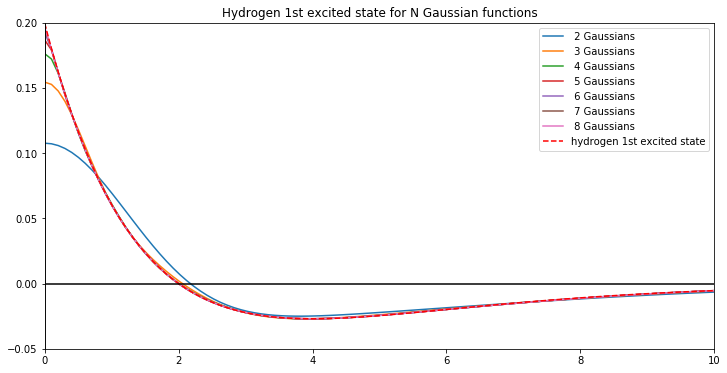

In [82]:
import matplotlib.pyplot as plt
x = np.linspace(0, 10.0, 100)
y = np.zeros(100,float)
gaussP = np.zeros(100,float)
for i in range (0,100):
    y[i] = Hydrogen(x[i])
plt.figure(figsize=(12,6))

for j in range (0,7):
    N = j+2
    initguess = np.zeros(N,float)
    if (j==0):
        alpha = [8/(9*np.pi), 16/(9*np.pi)]
    for k in range (0,N):
        if (k<N-1):
            initguess[k] = alpha[k]
        else:
            initguess[k] = alpha[k-1]*2
    alpha = ENparam(initguess,N)
    coeff = ENcoeff(alpha,N)
    if (j==0):
        sig=coeff[0]
        print(sig)
    else:
        if (sig*coeff[0]<0):
            for m in range (0,N):
                coeff[m] = -coeff[m]
    print(EN(alpha,N),alpha)
    for i in range (0,100):
        gaussP[i] = gaussN(x[i],alpha,coeff,N)
    plt.plot(x,gaussP, label=' %.1i Gaussians' %N)  




plt.title('Hydrogen 1st excited state for N Gaussian functions')

plt.plot(x, y, 'r--',label='hydrogen 1st excited state')
plt.axis([0, 10, -0.05, 0.2])
plt.legend()
plt.axhline(0, color='black')
plt.axvline(0, color='black')

In [62]:
-0.125

-0.125